In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Article Tags Exploration

In [3]:
print('Number relevant articles:', df['relevant'].sum())
print('Number tagged articles  :', df.loc[:, 'OEMC':'TASR'].any(1).sum())

Number relevant articles: 112091
Number tagged articles  : 36986


In [5]:
categories_df = ld.load_categories()
categories_df = categories_df.loc[:, ['abbreviation', 'category_name']]
categories_df.set_index('abbreviation', drop=True, inplace=True)

categories_df['counts'] = df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True)
categories_df.sort_values(by='counts')

,category_name,counts
abbreviation,,
ENVI,Environmental Crimes,49
TASR,Police Use of Taser,119
OEMC,Office of Emergency Management & Communications,127
REEN,Re-Entry,129
CPBD,Chicago Police Board,155
ILSC,Illinois State Court,179
IMMG,Immigration,218
CPUB,Cook County Public Defender's Office,222
IDOC,Illinois Department of Corrections,300


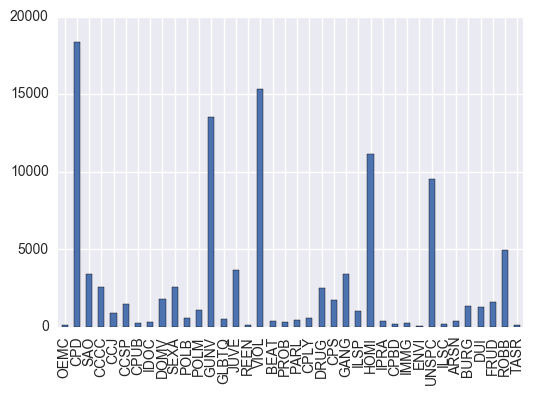

In [5]:
df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True).plot(kind='bar');

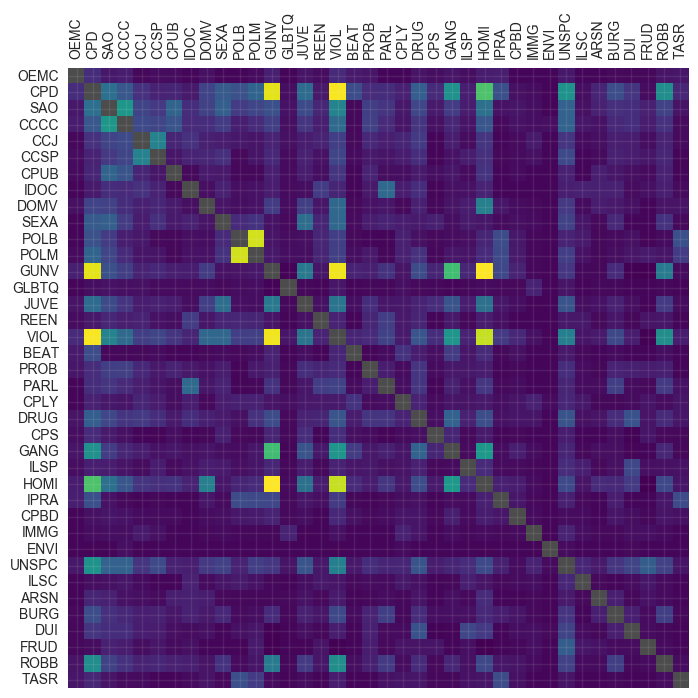

In [6]:
corrs = df.loc[:, 'OEMC':'TASR'].corr()
for i in range(corrs.shape[0]):
    corrs.iloc[i, i] = np.nan

cmap = matplotlib.cm.viridis
cmap.set_bad((.3, .3, .3),1.)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ma.masked_invalid(corrs.values), cmap=cmap)

ax.grid(True, color=(.9, .9, .9), alpha=.1)

plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90);
plt.yticks(range(len(corrs.columns)), corrs.columns);

# Text Contents Exploration

In [7]:
# Print a random article just to see what they look like.
i = np.random.choice(df.shape[0])
print('ARTICLE ID:', df.index[i], '\n------------------')
print(df.iloc[i]['bodytext'])

ARTICLE ID: 63061 
------------------
##  Meet: Tree House Humane Society

![][1]

[ 1 comment ][2]

[ Tweet ][3]

By  Michelle Cahill  , Friday at 11:31 am

![Meet: Tree House Humane Society][4]

> _ The measure of a society can be how well its people treat its weakest
members. - Gandhi _

>

> _ For more than 40 years Tree House has been caring exclusively for sick,
injured and abused stray cats - cats that often had no other chance at a good
life - but despite our best efforts and those of other shelters and animal
welfare agencies around the country, the number of stray and feral cats is
still not steadily decreasing as it should. - Tree House Humane Society _

In 1971, a group of families came together and became their own force of
animal welfare agents, creating an organization that would revolutionize the
way the city of Chicago deals with stray cats. That organization became Tree
House Humane Society.

Tree House is one of those rare organizations that employs real follow-throu

## Some questions:

* How to handle articles that talk about more than one crime (i.e. a summary of weekend violence)?
* Would we want the scraper to keep any more information going forward? Author name, for example?
* Do we want to have manually-defined cleaning built around the format? I.e. specifically remove the links at the bottom that are result of RSS format? 

In [8]:
import nltk
# you may need to run nltk.download()
# and get the "punkt" dataset under the "Models" tab
# to use the word_tokenize function. Other models might
# be necessary as well.

In [9]:
def all_words():
    counter = 0
    for txt in df['bodytext']:
        tokens = nltk.tokenize.word_tokenize(txt)
        for t in tokens:
            if t[0] not in '[](){},.\'"`*:;/\\-+=_':
                yield t.lower()
                counter += 1
            if counter > 5e6: # at some point will need to run fully, but truncate for now
                return

In [10]:
word_freqs = nltk.FreqDist(all_words())

"the": 231437
"to": 116701
"a": 112429
"and": 108191
"of": 97070
"in": 87230
"that": 44196
"for": 41221
"was": 40798
"said": 39098
"on": 35101
"he": 33583
"is": 30756
"with": 28984
"http": 27320
"at": 27077
"it": 25655
"his": 23825
"1": 23028
"2": 22471
"as": 20701
"by": 20654
"i": 20545
"3": 19684
"be": 18580
"from": 18571
"#": 18509
"4": 18202
"this": 18195
"not": 17076
"5": 16959
"have": 16805
"but": 16358
"an": 15952
"chicago": 15871
"police": 15635
"6": 15384
"they": 15253
"who": 15136
"are": 15050


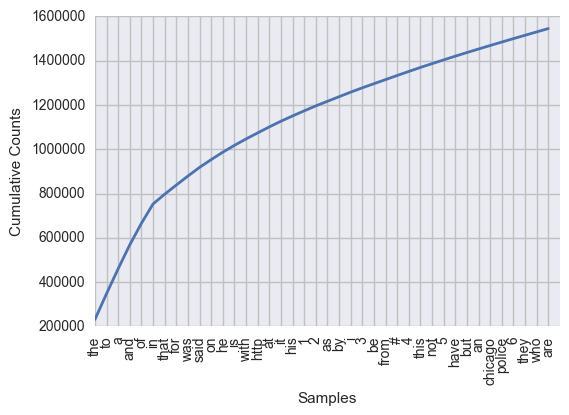

In [11]:
for pair in word_freqs.most_common(40):
    print('"{}": {}'.format(pair[0], pair[1]))
word_freqs.plot(40, cumulative=True)

In [12]:
print('The word "the" is {0:.4} times more common than "gun".'.format(
    word_freqs.freq('the') / word_freqs.freq('gun')
))

The word "the" is 173.5 times more common than "gun".


In [13]:
print('Confusion matrix using existence of "gun" to predict "GUNV" tag:')
pd.crosstab(df['bodytext'].str.contains('gun'), df['GUNV'])

Confusion matrix using existence of "gun" to predict "GUNV" tag:


GUNV,0,1
bodytext,,
False,238193,4347
True,20121,9147


# Model Exploration

Create a simple logistic classifier from a bag-of-words feature set.

In [14]:
import sklearn

In [15]:
crime_df = df.ix[df['relevant'], :]
print(crime_df.shape)
crime_df = crime_df.ix[crime_df.loc[:, 'OEMC':'TASR'].any(1), :]
print(crime_df.shape)

idx = np.random.permutation(crime_df.shape[0])
trn = crime_df.iloc[idx[:int(crime_df.shape[0] * 0.7)], :]
tst = crime_df.iloc[idx[int(crime_df.shape[0] * 0.7):], :]
print(trn.shape)
print(tst.shape)

(112091, 45)
(34253, 45)
(23977, 45)
(10276, 45)


In [16]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)
X = vectorizer.fit_transform(trn['bodytext'].values)
Y = trn.loc[:, 'OEMC':'TASR'].values

In [17]:
X.shape

(23977, 118979)

In [18]:
clf = sklearn.multiclass.OneVsRestClassifier(
    sklearn.linear_model.LogisticRegression()
)
clf.fit(X, Y)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [19]:
X_tst = vectorizer.transform(tst['bodytext'].values)
Y_tst = tst.loc[:, 'OEMC':'TASR'].values

Y_hat = clf.predict_proba(X_tst)

In [20]:
perf = pd.DataFrame()

for i in range(Y_hat.shape[1]):
    tag = tst.columns[7+i]
    perf.loc['TP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 1))
    perf.loc['FP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 0))
    perf.loc['TN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 0))
    perf.loc['FN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 1))
    perf.loc['TPR', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FN', tag])
    perf.loc['FPR', tag] = perf.loc['FP', tag] / (perf.loc['FP', tag] + perf.loc['TN', tag])
    perf.loc['PPV', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FP', tag])

perf = perf.T
perf

,TP,FP,TN,FN,TPR,FPR,PPV
OEMC,6.0,5.0,10234.0,31.0,0.162162,0.000488,0.545455
CPD,4374.0,1099.0,3882.0,921.0,0.826062,0.220638,0.799196
SAO,590.0,321.0,8954.0,411.0,0.589411,0.034609,0.647640
CCCC,370.0,245.0,9282.0,379.0,0.493992,0.025716,0.601626
CCJ,129.0,45.0,9974.0,128.0,0.501946,0.004491,0.741379
CCSP,233.0,84.0,9790.0,169.0,0.579602,0.008507,0.735016
CPUB,21.0,15.0,10205.0,35.0,0.375000,0.001468,0.583333
IDOC,34.0,15.0,10170.0,57.0,0.373626,0.001473,0.693878
DOMV,310.0,128.0,9641.0,197.0,0.611440,0.013103,0.707763
SEXA,593.0,76.0,9489.0,118.0,0.834037,0.007946,0.886398


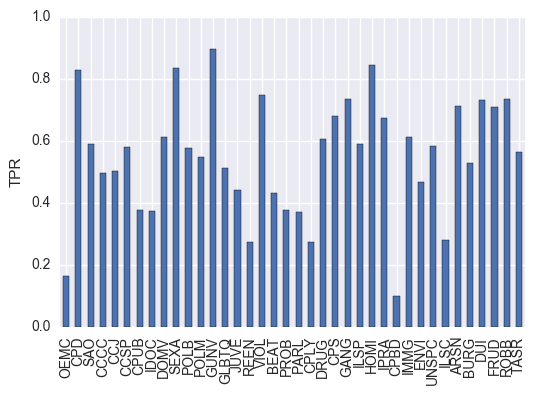

In [21]:
perf['TPR'].plot(kind='bar', ylim=[0,1])
plt.ylabel('TPR');

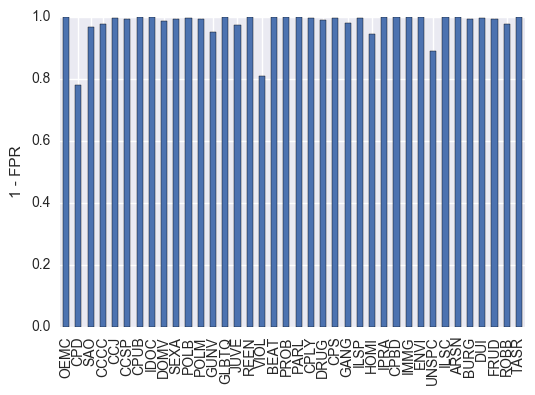

In [22]:
(1 - perf['FPR']).plot(kind='bar', ylim=[0,1])
plt.ylabel('1 - FPR');

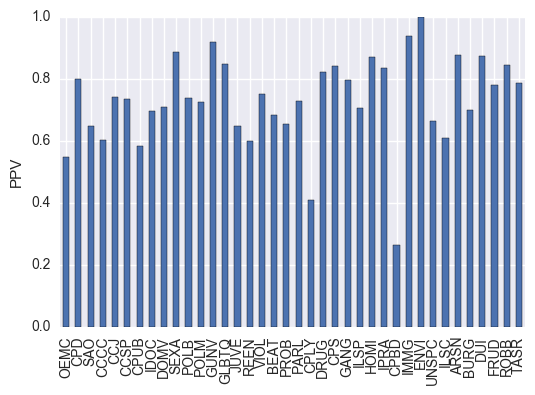

In [23]:
perf['PPV'].plot(kind='bar', ylim=[0,1])
plt.ylabel('PPV');